In [1]:
# importing the required modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

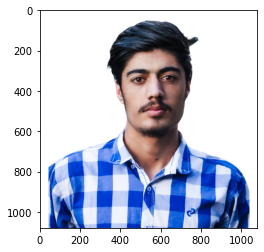

In [4]:
# importing the image
image = mpimg.imread('Profile.png')

# showing the image
plt.imshow(image)


# # Convert to grayscale for filtering
# gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)


# plt.imshow(gray, cmap='gray') 

In [5]:
# sobel 3x3 filter - horizonal edges
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


#  3X3 filter -- vertical edge detection
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

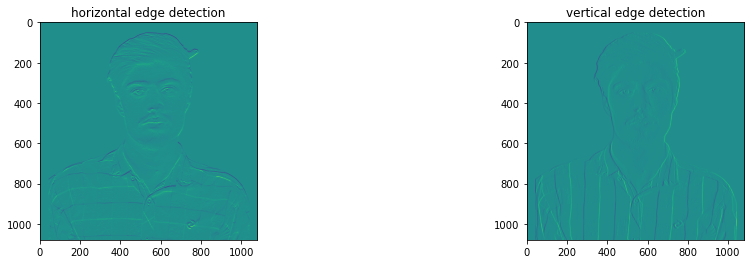

In [10]:
# filter the image using filter 
filtered_image1 = cv2.filter2D(gray, -1, sobel_y)
filtered_image2 = cv2.filter2D(gray, -1, sobel_x)

# plotting the filtered images
f, ax = plt.subplots(1, 2, figsize=(16, 4))

# plotting the horizontal edge detections
ax[0].set_title('horizontal edge detection')
ax[0].imshow(filtered_image1)

# plotting the vertical edge dections
ax[1].set_title('vertical edge detection')
ax[1].imshow(filtered_image2)

In [11]:
# importing the tensorflow module
import tensorflow as tf

# importing the training and testing dataset
(x_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

2022-07-03 18:29:23.982841: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/uca/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-07-03 18:29:23.982955: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


170498071/170498071 [==============================] - 858s 5us/step


In [14]:
# printing the shape of the dataset
print(x_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


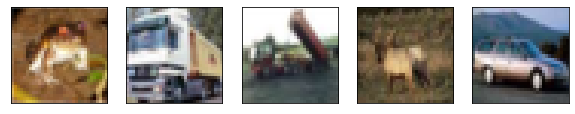

In [17]:
# size of the plots
plt.figure(figsize=(10,8))

# for loop for 5 images
for i in range(5):
    
    #plotting the images
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
plt.show()

In [19]:
# scalling dataset
x_train= x_train / 255.0
X_test = X_test / 255.0

In [ ]:
# building model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# flattening the input matrix
model.add(tf.keras.layers.Flatten())

# applying hidden layer with 32 nodes
model.add(tf.keras.layers.Dense(32, activation='relu'))

# output layer with 10 nodes
model.add(tf.keras. layers.Dense(10))

In [20]:
# initializing the model
model = tf.keras.models.Sequential()

# creating the input layer for the images
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

2022-07-03 20:35:05.036789: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/uca/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2022-07-03 20:35:05.038711: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-03 20:35:05.062264: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (UCA-Nar): /proc/driver/nvidia/version does not exist
2022-07-03 20:35:05.181017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
# pooling the images
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# convolutional layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

# pooling second time
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# convolutional layer again
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))

In [22]:
# flattening the input matrix
model.add(tf.keras.layers.Flatten())

In [23]:
# hidden layer with 32 nodes
model.add(tf.keras.layers.Dense(32, activation='relu'))

# output layer with 10 nodes
model.add(tf.keras. layers.Dense(10))

In [24]:
# compiling the model
model.compile(optimizer='adam',
              
#               cross entropy as loss function
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# fitting model
model.fit(x_train, y_train, epochs=10)

2022-07-03 20:42:17.902603: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 [==============================] - 36s 21ms/step - loss: 1.5279 - accuracy: 0.4431
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1474 - accuracy: 0.5949
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9996 - accuracy: 0.6503
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8938 - accuracy: 0.6870
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8211 - accuracy: 0.7129
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7620 - accuracy: 0.7326
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7104 - accuracy: 0.7500
Epoch 8/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6675 - accuracy: 0.7670
Epoch 9/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6221 - accuracy: 0.7822
Epoch 10/10
1563/1563 [==============================] - 31s 20m

In [25]:
# finding the test accuracy
test_acc = model.evaluate(X_test,  y_test)

2022-07-03 21:21:40.187115: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 5ms/step - loss: 0.8754 - accuracy: 0.7124


In [27]:
# accuracy of the model
print(test_acc[1])

0.7124000191688538


ValueError: in user code:

    File "/home/uca/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/home/uca/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/uca/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "/home/uca/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
        return self(x, training=False)
    File "/home/uca/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/uca/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1)
    
    Call arguments received by layer "sequential" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=uint8)
      • training=False
      • mask=None


In [30]:
# importing the required modules
# import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,test_acc)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# showing the matrix
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [10000, 2]